In [1]:
from __future__ import print_function

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import os

In [4]:
data = pd.read_csv("A2_mosquito_data.csv")
print (data)

    year  temperature  rainfall  mosquitos
0   1960           82       200        180
1   1961           70       227        194
2   1962           89       231        207
3   1963           74       114        121
4   1964           78       147        140
5   1965           85       151        148
6   1966           86       172        162
7   1967           75       106        112
8   1968           70       276        230
9   1969           86       165        162
10  1970           83       222        198
11  1971           78       297        247
12  1972           87       288        248
13  1973           76       286        239
14  1974           86       231        202
15  1975           90       284        243
16  1976           76       190        175
17  1977           87       257        225
18  1978           88       128        133
19  1979           87       218        199
20  1980           81       206        184
21  1981           74       175        160
22  1982   

<AxesSubplot:xlabel='year'>

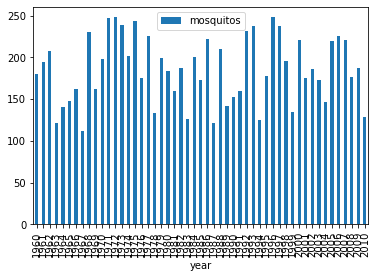

In [7]:
# comment: bar plot
mos_vs_year = data[['year', 'mosquitos']]
mos_vs_year.plot(kind='bar', x='year')

Text(0.5, 1.0, 'Yearly rainfall')

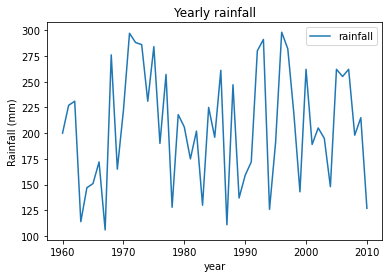

In [9]:
rain_vs_year = data[['year','rainfall']]
rain_vs_year.plot(kind='line', x='year')
plt.xlabel('year')
plt.ylabel('Rainfall (mm)')
plt.title('Yearly rainfall')

Text(0.5, 1.0, 'Relationship Mosquito vs rainfall')

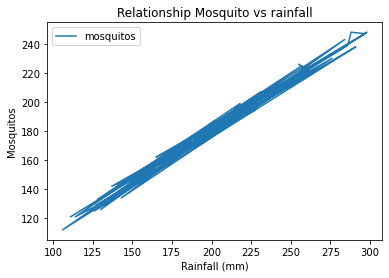

In [11]:
mos_vs_rain = data[['mosquitos','rainfall']]
mos_vs_rain.plot(kind='line', x='rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Mosquitos')
plt.title('Relationship Mosquito vs rainfall')

In [12]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='rainfall', ylabel='rainfall'>,
        <AxesSubplot:xlabel='mosquitos', ylabel='rainfall'>],
       [<AxesSubplot:xlabel='rainfall', ylabel='mosquitos'>,
        <AxesSubplot:xlabel='mosquitos', ylabel='mosquitos'>]],
      dtype=object)

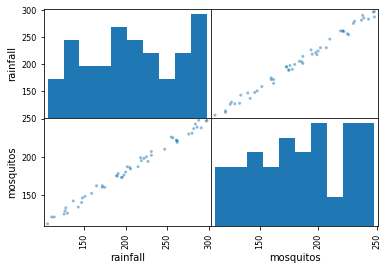

In [13]:
scatter_matrix(data[['rainfall','mosquitos']])

array([[<AxesSubplot:xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot:xlabel='mosquitos', ylabel='temperature'>],
       [<AxesSubplot:xlabel='temperature', ylabel='mosquitos'>,
        <AxesSubplot:xlabel='mosquitos', ylabel='mosquitos'>]],
      dtype=object)

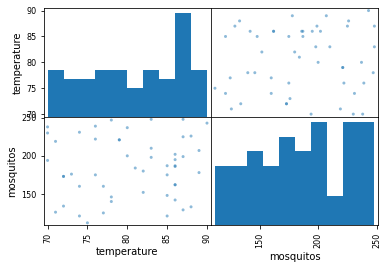

In [14]:
scatter_matrix(data[['temperature','mosquitos']])

In [15]:
data.corr()
#data[['rainfall','mosquitos']].corr()

,year,temperature,rainfall,mosquitos
year,1.000000,-0.029602,0.064960,0.047135
temperature,-0.029602,1.000000,-0.015837,0.059395
rainfall,0.064960,-0.015837,1.000000,0.995648
mosquitos,0.047135,0.059395,0.995648,1.000000


In [ ]:
import statsmodels.api as sm
import numpy as np

x = data['rainfall']
y = data['mosquitos']
X = sm.add_constant(x) # add y axis intercept

# method Ordinary Least Squares

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

In [ ]:
data.hist()

In [ ]:
bins = [0,150,250,350]
labels = ['dry', 'noram', 'wet']
pd.cut(data['rainfall'], bins, labels=labels).value_counts().plot(kind = 'pie')